# Noise Suppression

* Author: Johannes Maucher
* Last Update: 10th October 2016

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import filters

from skimage import data, color, img_as_float
from sklearn.preprocessing import minmax_scale
import cv2

In [2]:
import warnings
warnings.filterwarnings("ignore")

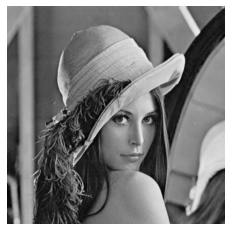

In [14]:
image = cv2.imread('../Data/lenaGrey.png',cv2.IMREAD_GRAYSCALE)
plt.axis("off")
plt.imshow(image,cmap="gray")
plt.show()

In [15]:
mu=0
stddev=10
gaussNoise=np.floor(np.random.randn(image.shape[0],image.shape[1])*stddev+mu)
print(gaussNoise)
print(gaussNoise.min())
print(gaussNoise.max())

[[ -2.   0.  -5. ...   2. -11. -19.]
 [ -9.   5. -10. ...  -3. -15.   4.]
 [ -3.  -1.  -6. ... -16.  -3.  -9.]
 ...
 [  9.   3.  -8. ... -12.  15.   1.]
 [ -4.  -5.   9. ...  -6.  -1.   9.]
 [  2. -10.  -8. ...  -7.   4.  18.]]
-44.0
43.0


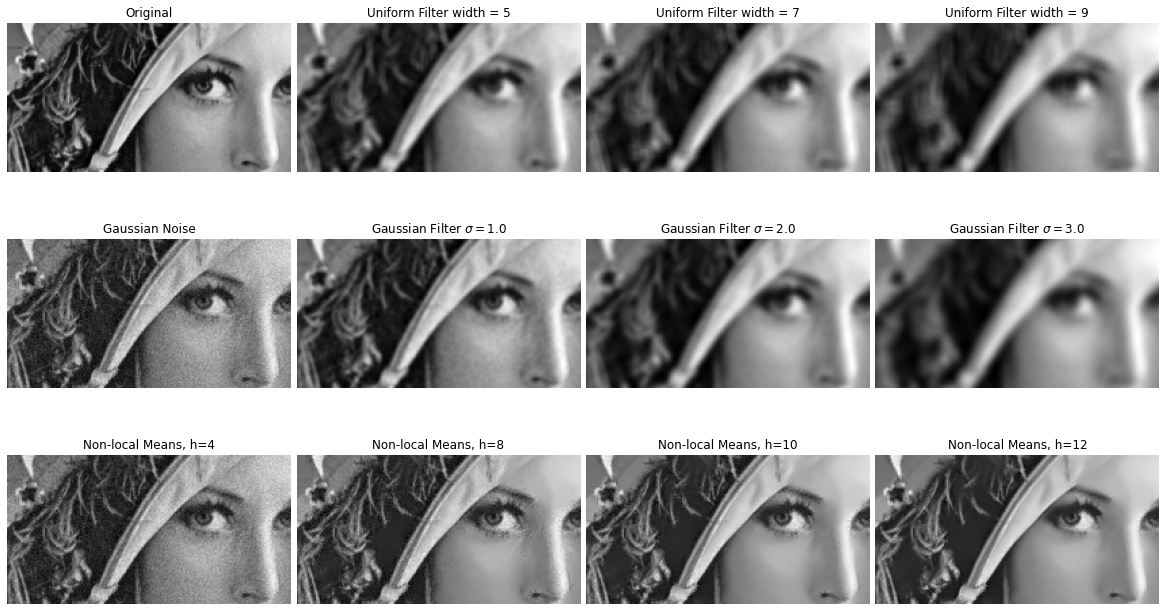

In [16]:
lenaGrey=image
lenaGN=np.clip(image+gaussNoise,0,255).astype("uint8")


xP=lenaGrey.shape[0]
yP=lenaGrey.shape[1]

ux=220
ox=330
uy=120
oy=330




fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

ax[0, 0].imshow(lenaGrey[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[0, 0].axis('off')
ax[0, 0].set_title('Original')

ax[1, 0].imshow(lenaGN[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[1, 0].axis('off')
ax[1, 0].set_title('Gaussian Noise')



ax[0, 1].imshow(filters.uniform_filter(lenaGN,5,output=np.float64, mode='nearest')[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[0, 1].axis('off')
ax[0, 1].set_title('Uniform Filter width = 5')

ax[0, 2].imshow(filters.uniform_filter(lenaGN,7,output=np.float64, mode='nearest')[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[0, 2].axis('off')
ax[0, 2].set_title('Uniform Filter width = 7')

ax[0, 3].imshow(filters.uniform_filter(lenaGN,9,output=np.float64, mode='nearest')[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[0, 3].axis('off')
ax[0, 3].set_title('Uniform Filter width = 9')



ax[1, 1].imshow(filters.gaussian_filter(lenaGN, sigma=1.0,output=np.float64, mode='nearest')[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[1, 1].axis('off')
ax[1, 1].set_title('Gaussian Filter $\sigma=1.0$')

ax[1, 2].imshow(filters.gaussian_filter(lenaGN, sigma=2.0,output=np.float64, mode='nearest')[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[1, 2].axis('off')
ax[1, 2].set_title('Gaussian Filter $\sigma=2.0$')

ax[1, 3].imshow(filters.gaussian_filter(lenaGN, sigma=3.0,output=np.float64, mode='nearest')[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[1, 3].axis('off')
ax[1, 3].set_title('Gaussian Filter $\sigma=3.0$')



ax[2, 0].imshow(cv2.fastNlMeansDenoising(lenaGN,h=4)[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[2, 0].axis('off')
ax[2, 0].set_title('Non-local Means, h=4')

ax[2, 1].imshow(cv2.fastNlMeansDenoising(lenaGN,h=8)[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[2, 1].axis('off')
ax[2, 1].set_title('Non-local Means, h=8')

ax[2, 2].imshow(cv2.fastNlMeansDenoising(lenaGN,h=10)[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[2, 2].axis('off')
ax[2, 2].set_title('Non-local Means, h=10')

ax[2, 3].imshow(cv2.fastNlMeansDenoising(lenaGN,h=12)[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[2, 3].axis('off')
ax[2, 3].set_title('Non-local Means, h=12')

fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)

plt.show()